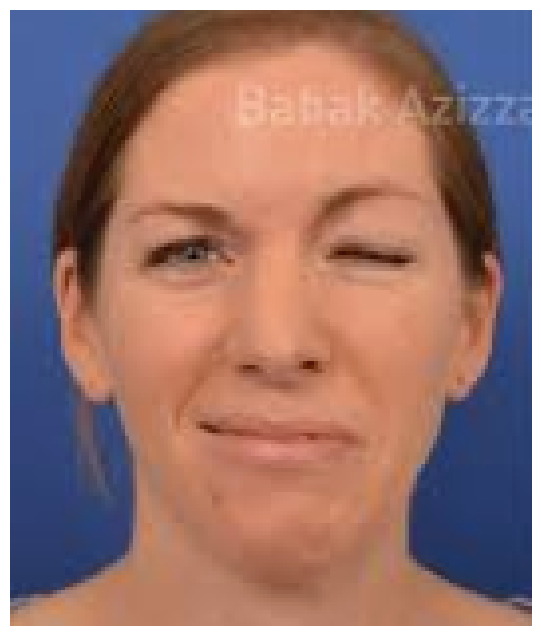

In [1]:
import cv2
import matplotlib.pyplot as plt
import mediapipe
import pandas as pd
import mediapipe as mp 
# Try to read the image
img = cv2.imread(r"C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy\fg6.PNG")

# Check if the image was read successfully
if img is None:
    print("Error: Image not found or unable to read.")
else:
    # Display the image using matplotlib
    fig = plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(img[:, :, ::-1])  # Convert BGR to RGB for displaying
    plt.show()


Here FaceMesh class is used to detect the facial landmarks 

In [2]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

here I converted my image to RGB(as mediapipe uses rgb) from BGR(opencV uses BGR)

In [3]:
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]

In [4]:
data = {'p1': [207, 205, 36 , 203 , 98, 97, 2 , 326 , 327 , 423 , 266 , 425 , 427 , 434 , 430 , 431 , 418 , 421 ,200 , 201 , 194 , 204 , 202 , 214],
        'p2': [205, 36 , 203 , 98, 97, 2 , 326 , 327 , 423 , 266 , 425 , 427 , 434 , 430 , 431 , 418 , 421 ,200 , 201 , 194 , 204 , 202 , 214, 207]}

df = pd.DataFrame(data)
print(df)

     p1   p2
0   207  205
1   205   36
2    36  203
3   203   98
4    98   97
5    97    2
6     2  326
7   326  327
8   327  423
9   423  266
10  266  425
11  425  427
12  427  434
13  434  430
14  430  431
15  431  418
16  418  421
17  421  200
18  200  201
19  201  194
20  194  204
21  204  202
22  202  214
23  214  207


here we added the path in routes :-- routes == [[205, 36], [36,203], .......[207,205]]

In [5]:
routes_idx = []
 
p1 = df.iloc[0]["p1"]
p2 = df.iloc[0]["p2"]
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df["p1"] == p2]
    p1 = obj["p1"].values[0]
    p2 = obj["p2"].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)
 
# -------------------------------
 
for route_idx in routes_idx:
    print(f"Draw a line between {route_idx[0]}th landmark point to {route_idx[1]}th landmark point")

Draw a line between 205th landmark point to 36th landmark point
Draw a line between 36th landmark point to 203th landmark point
Draw a line between 203th landmark point to 98th landmark point
Draw a line between 98th landmark point to 97th landmark point
Draw a line between 97th landmark point to 2th landmark point
Draw a line between 2th landmark point to 326th landmark point
Draw a line between 326th landmark point to 327th landmark point
Draw a line between 327th landmark point to 423th landmark point
Draw a line between 423th landmark point to 266th landmark point
Draw a line between 266th landmark point to 425th landmark point
Draw a line between 425th landmark point to 427th landmark point
Draw a line between 427th landmark point to 434th landmark point
Draw a line between 434th landmark point to 430th landmark point
Draw a line between 430th landmark point to 431th landmark point
Draw a line between 431th landmark point to 418th landmark point
Draw a line between 418th landmark 

here we converted the landmark points to the coordinates of the face and inseted in routes

In [6]:
routes = []
 
for source_idx, target_idx in routes_idx:
     
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
         
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
 
    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
     
    routes.append(relative_source)
    routes.append(relative_target)

1) created mask of same shape as of hte image and filled with all zero 
2) now using fillconvexPoly i created the polygon following the path in routes and made its all value to 1 inside poly and zero outside the poly
3) asType bool makes all points sinside 1 and 0 outside and mask is created
4) out is same image size matrix with all zero and mask is apllied on it 


In [7]:
import numpy as np
 
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)
  
out = np.zeros_like(img)
out[mask] = img[mask]
 

In [ ]:
1) coords contains all points in which bool value is one
2) top_left = we get the top left as min value in axis 0 
3) bottom_right = we get bottom right as max value in axis 0 
4) here cropped_img contains the masked image as it created the bounding box with the row ange and column range provided by 



<img src="C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\p5.png" alt="Description of Image" width="500"/>



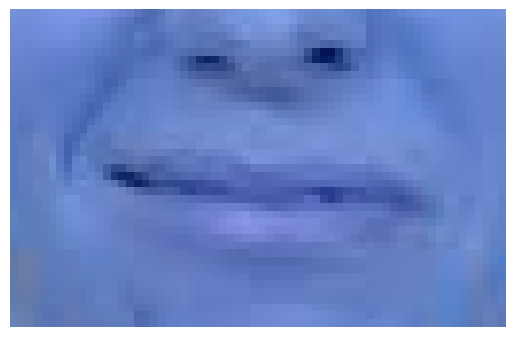

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create the mask
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)

# Get coordinates of the bounding box
coords = np.column_stack(np.where(mask))
top_left = coords.min(axis=0)
bottom_right = coords.max(axis=0)

# Extract the sub-matrix using the bounding box coordinates
out = np.zeros_like(img)
out[mask] = img[mask]
cropped_img = out[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]

# Create the cropped mask
cropped_mask = mask[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]

# Fill the non-masked regions in the cropped image with the original image's pixels
for i in range(cropped_img.shape[0]):
    for j in range(cropped_img.shape[1]):
        if not cropped_mask[i, j]:
            cropped_img[i, j] = img[top_left[0] + i, top_left[1] + j]

# Display the result
plt.imshow(cropped_img)
plt.axis('off')  # Turn off axis labels
plt.show()


In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd

def crop_image_from_landmarks(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was read successfully
    if img is None:
        print("Error: Image not found or unable to read.")
        return None

    # Initialize FaceMesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

    # Process the image with FaceMesh
    results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Check if face landmarks are detected
    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0]

        # Define the landmark connections
        data = {
            'p1': [207, 205, 36 , 203 , 98, 97, 2 , 326 , 327 , 423 , 266 , 425 , 427 , 434 , 430 , 431 , 418 , 421 ,200 , 201 , 194 , 204 , 202 , 214],
            'p2': [205, 36 , 203 , 98, 97, 2 , 326 , 327 , 423 , 266 , 425 , 427 , 434 , 430 , 431 , 418 , 421 ,200 , 201 , 194 , 204 , 202 , 214, 207]
        }

        df = pd.DataFrame(data)
        routes_idx = []

        p1 = df.iloc[0]["p1"]
        p2 = df.iloc[0]["p2"]

        # Create routes indices
        for i in range(0, df.shape[0]):
            obj = df[df["p1"] == p2]
            p1 = obj["p1"].values[0]
            p2 = obj["p2"].values[0]
            route_idx = [p1, p2]
            routes_idx.append(route_idx)

        # Extract relative coordinates for routes
        routes = []
        for source_idx, target_idx in routes_idx:
            source = landmarks.landmark[source_idx]
            target = landmarks.landmark[target_idx]
            relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
            relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
            routes.append(relative_source)
            routes.append(relative_target)

        # Create the cropped image
        cropped_img = crop_image(img, landmarks, routes)

        return cropped_img

    else:
        print("No face landmarks detected in the image.")
        return None

def crop_image(img, landmarks, routes):
    # Create the mask
    mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
    mask = mask.astype(bool)

    # Get coordinates of the bounding box
    coords = np.column_stack(np.where(mask))
    top_left = coords.min(axis=0)
    bottom_right = coords.max(axis=0)

    # Extract the sub-matrix using the bounding box coordinates
    out = np.zeros_like(img)
    out[mask] = img[mask]
    cropped_img = out[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]

    # Create the cropped mask
    cropped_mask = mask[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]

    # Fill the non-masked regions in the cropped image with the original image's pixels
    for i in range(cropped_img.shape[0]):
        for j in range(cropped_img.shape[1]):
            if not cropped_mask[i, j]:
                cropped_img[i, j] = img[top_left[0] + i, top_left[1] + j]

    return cropped_img

def process_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # List all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg') or f.endswith('.jpeg')]
    
    # Sort image files to maintain order
    image_files.sort()
    
    # Process each image and save the output
    for i, image_file in enumerate(image_files):
        # Generate input and output paths
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, f"cropped_{image_file}")
        
        # Process the image using crop_image_from_landmarks function
        processed_img = crop_image_from_landmarks(input_path)
        
        if processed_img is not None:
            # Save the processed output image
            cv2.imwrite(output_path, processed_img)
            print(f"Processed {input_path} and saved to {output_path}")

# Input and output folder paths
input_folder = r"C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy" 
output_folder = r"C:\Users\hp\Desktop\detection of the bels palsy\first data\affected"  

# Process images and save the output
process_images(input_folder, output_folder)


Processed C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy\1405JEMSmul-Fig3b.jpg and saved to C:\Users\hp\Desktop\detection of the bels palsy\first data\affected\cropped_1405JEMSmul-Fig3b.jpg
Processed C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy\2-ramsay-hunt-syndrome-dr-p-marazziscience-photo-library.jpg and saved to C:\Users\hp\Desktop\detection of the bels palsy\first data\affected\cropped_2-ramsay-hunt-syndrome-dr-p-marazziscience-photo-library.jpg
Processed C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy\27_01.jpg and saved to C:\Users\hp\Desktop\detection of the bels palsy\first data\affected\cropped_27_01.jpg
Processed C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy\27_03.jpg and saved to C:\Users\hp\Desktop\detection of the bels palsy\first data\affected\cropped_27_03.jpg
Processed C:\Users\hp\Desktop\detection of the bels palsy\mediapipe\droopy\28_01.jpg and saved to C:\Users\hp\Desktop\detection of the bel